In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


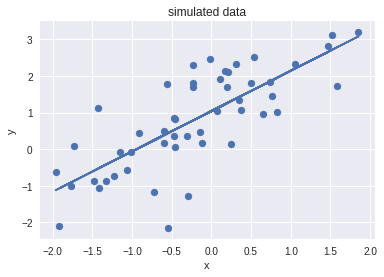

intercept =  1.0410217387867964 solpe =  1.1030756454608008


In [2]:
###################
## Blood Pressure data
#x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
#     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
#y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
#     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
#     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
#x = np.asarray(x, np.float32) 
#y = np.asarray(y, np.float32) 


#################
## Simulated data 
n = 50
np.random.seed(42)
x = np.random.normal(0,1,n)
y = x + 1 + np.random.normal(0,1,n) 

plt.scatter(x=x,y=y)
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)

plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)

In [0]:
def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

In [4]:
loss(1.0410217387867964 ,1.1030756454608008)

0.7491512476548897

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


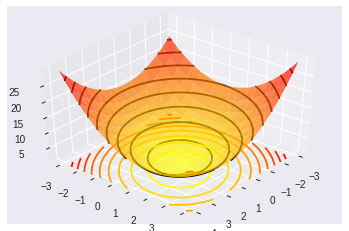

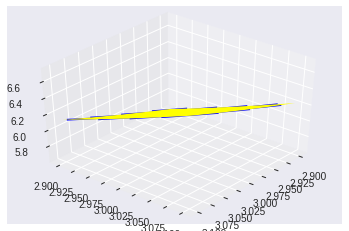

In [5]:
from mpl_toolkits.mplot3d import axes3d

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
a = b = np.arange(-3.0, 4.0, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="autumn_r", lw=3, rstride=9, cstride=9,edgecolor='none',alpha=0.7)
ax.contour(A, B, loss, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(A, B, loss, 10, lw=3, colors="k", linestyles="solid")
ax.view_init(40, 40)
plt.show()

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
a = b = np.arange(2.9, 3.1, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="autumn_r", lw=3, rstride=9, cstride=9,edgecolor='none')
ax.contour(A, B, loss, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(A, B, loss, 10, lw=3, colors="blue", linestyles="solid")
ax.view_init(40, 40)
plt.show()

## The gradients needed

The gradients are given as:

$$
  grad_a = \frac{\partial}{\partial a}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i) x_i 
$$


$$
  grad_b = \frac{\partial}{\partial b}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i)  
$$

In [0]:
def grad(a,b):
  y_hat = a*x + b
  n2 = 2.0 / len(x)
  return n2*np.sum((y_hat - y)*x) , n2*np.sum((y_hat - y))


def loss(a,b):
  return 1/len(y)*(np.sum((a*x + b - y)**2))

In [7]:
eta = 0.05
a_ = -3.0
b_ = -3.0
loss_ = loss(a_,b_)
a_history = a_
b_history = b_
loss_history= loss_
for i in range(20):
    grad_a, grad_b  = grad(a_,b_)
    a_ = a_ - eta * grad_a
    b_ = b_ - eta * grad_b
    loss_= loss(a_,b_)
    a_history =np.append(a_history,a_) 
    b_history =np.append(b_history,a_) 
    loss_history =np.append(loss_history,loss_) 
    print("a = ", a_, "b = ", b_, "gard_a = ", grad_a, "gard_b = ", grad_b, "loss = ", loss_)

a =  -2.7197282433316414 b =  -2.688411475055661 gard_a =  -5.605435133367175 gard_b =  -6.231770498886784 loss =  21.447214831790934
a =  -2.4577995279150255 b =  -2.4016624058548546 gard_a =  -5.238574308332318 gard_b =  -5.734981384016131 loss =  18.541035245016563
a =  -2.2131136145536865 b =  -2.1376824345377576 gard_a =  -4.893718267226783 gard_b =  -5.279599426341936 loss =  16.044652420949323
a =  -1.984623170058737 b =  -1.8945834315076957 gard_a =  -4.569808889898993 gard_b =  -4.861980060601237 loss =  13.899856622000922
a =  -1.7713330872803428 b =  -1.6706424654972412 gard_a =  -4.265801655567881 gard_b =  -4.478819320209088 loss =  12.056799896124645
a =  -1.572299482705376 b =  -1.4642864612961872 gard_a =  -3.9806720914993345 gard_b =  -4.127120084021079 loss =  10.472774543992346
a =  -1.386628438858426 b =  -1.2740783691051663 gard_a =  -3.7134208769390016 gard_b =  -3.8041618438204194 loss =  9.111174428172976
a =  -1.2134745486882834 b =  -1.0987046885983318 gard_a 

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


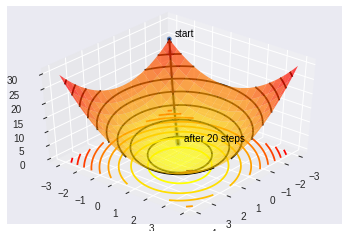

In [8]:
from mpl_toolkits.mplot3d import axes3d

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot3D(a_history, b_history, loss_history, 'black',lw=2)
a = b = np.arange(-3.0, 4.0, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="autumn_r", lw=3, rstride=9, cstride=9,edgecolor='none',alpha=0.7)
ax.contour(A, B, loss, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(A, B, loss, 10, lw=3, colors="k", linestyles="solid")
ax.view_init(40, 40)

ax.scatter3D(a_history, b_history,loss_history,"black")
#for i in range(0,len(loss_history)):
ax.text(a_history[0]-0.4, b_history[0], loss_history[0], "start", color='black',zorder=100)
ax.text(a_history[-1]-0.4, b_history[-1], loss_history[-1], "after 20 steps", color='black',zorder=100)
plt.show()